# Voleon Interview Problem

### Summary

This is a regression learning problem and the hypothesis set is assumed to be a first degree polynomials. We will estimate the coefficients of the model by minimizing the loss function. Three loss functions will be used: Ordinary Least Square (OLS), OLS with $\mathscr{l}_1$ penalty, and OLS with $\mathscr{l}_2$ penalty. We will then use K-Fold cross-validation to average the estimated weights and compare the results.


### General learning problem

Data points $(x_n, y_n)$ are generated from the joint distribution $$P(x,y) = P(x) P(y|x).$$ 

$P(x)$ is the distribution of the independent variable $x$ and $$P(y|x) = f(x) + P(e|x).$$ 

$f(x)$ is the deterministic target function from input space $\mathcal{X}$ to output space $\mathcal{Y}$ ($f: \mathcal{X}\to \mathcal{Y}$), and e is the noise in the target function. The target function can be found by: $$f(x) = \mathbb{E}[y|x].$$

Moreover, the noise in the target has the property $$\mathbb{E}[e|x] = 0$$

As instructed in the statement of the problem, we assume a hypothesis set $\mathcal{H}$ with first degree polynomials:

$$\mathcal{H} = \{h \mid h(x) = w_0 + w_1 x ~ \forall ~ w_0, w_1 \in \mathbb{R}\}$$

The goal is to find the best hypothesis $g$ from our hypothesis set $\mathcal{H}$ that minimizes the error between $g(x)$ and $f(x)$.


### Model Formulation with linear regression algorithm

As mentioned before, we assume our model (hypothesis) function to be a linear combination of the independent variable $x$:

$$
h(\mathbf{x}) = \mathbf{w}^\mathrm{T} \mathbf{x}
\\[0.3em]
\mathbf{w} = \begin{bmatrix}
           w_0 \\[0.3em]
           w_1 \\[0.3em]
          \end{bmatrix}
~ , ~ 
\mathbf{x} = \begin{bmatrix}
           1 \\[0.3em]
           x \\[0.3em]
           \end{bmatrix}
$$

Our learning algorithm is to find the weights $a = w_0$ and $b = w_1$ such that they minimize the error. In order to find the best values, we will use three loss functions as our error measures:

1. Mean Squared Error (MSE): Ordinary Least Square (OLS) linear regression
2. MSE + $\mathscr{l}_1$ regularizer: Lasso linear regression
3. MSE + $\mathscr{l}_2$ regularizer: Ridge linear regression


**Note**: General Method of Moments (GMM) will result in the same error measure as using Mean Squared Error (MSE).

### Optimization problem

#### OLS linear regression:

$$
Loss = \frac{1}{N} \sum^N_{n=1} (\mathbf{w}^\mathrm{T} \mathbf{x}_n - y_n)^2
$$

MSE loss function is beneficial when we would like to accomodate effect of every data point. It is a very simple model and minimization of the loss function has a closed form solution:

$$
\mathbf{w} = \mathbf{X}^\dagger \mathbf{y}
$$

where:
$$
\mathbf{X} = \begin{bmatrix}
           \mathbf{x}^\mathrm{T}_1 \\[0.3em]
           \mathbf{x}^\mathrm{T}_2 \\[0.3em]
           \vdots \\[0.3em]
           \mathbf{x}^\mathrm{T}_N \\[0.3em]
           \end{bmatrix}
~ , ~
\mathbf{y} = \begin{bmatrix}
           y_1 \\[0.3em]
           y_2 \\[0.3em]
           \vdots \\[0.3em]
           y_N \\[0.3em]
           \end{bmatrix}
$$

$$
\mathbf{X}^\dagger = \left( \mathbf{X}^\mathrm{T} \mathbf{X}\right)^{-1} \mathbf{X}^\mathrm{T}
$$


#### Lasso linear regression:

$$
Loss = \frac{1}{N} \sum^N_{n=1} (\mathbf{w}^\mathrm{T} \mathbf{x}_n - y_n)^2 + \alpha \| \mathbf{w} \|
$$


Lasso is more robust to the effect of outliers. I will use the coordinate descent optimization method (the default method for Lasso regression in python) to minimize the loss function and find weight parameters $a$ and $b$.


#### Ridge linear regression:
$$
Loss = \frac{1}{N} \sum^N_{n=1} (\mathbf{w}^\mathrm{T} \mathbf{x}_n - y_n)^2 + \alpha \mathbf{w}^\mathrm{T}\mathbf{w} 
$$

Ridge linear regression has a smooth loss function but it is less robust to the effect of outliers. Conjugate gradient method will be used to minimize the loss function and find the weight parameters $a$ and $b$.

### 1. Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from scipy.stats import boxcox
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from IPython.display import display

sns.set()
sns.set_style("whitegrid")
# sns.set(style="ticks")
%matplotlib inline
hetero_test = sm.stats.diagnostic.het_goldfeldquandt
hetero_test = sm.stats.diagnostic.het_breuschpagan

//anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### 2. Loading data:

In [2]:
data = {}
data[1] = pd.read_csv('data_1_1.csv')
data[2] = pd.read_csv('data_1_2.csv')
data[3] = pd.read_csv('data_1_3.csv')
data[4] = pd.read_csv('data_1_4.csv')
data[5] = pd.read_csv('data_1_5.csv')

### 3. Initial exploratory data visualization

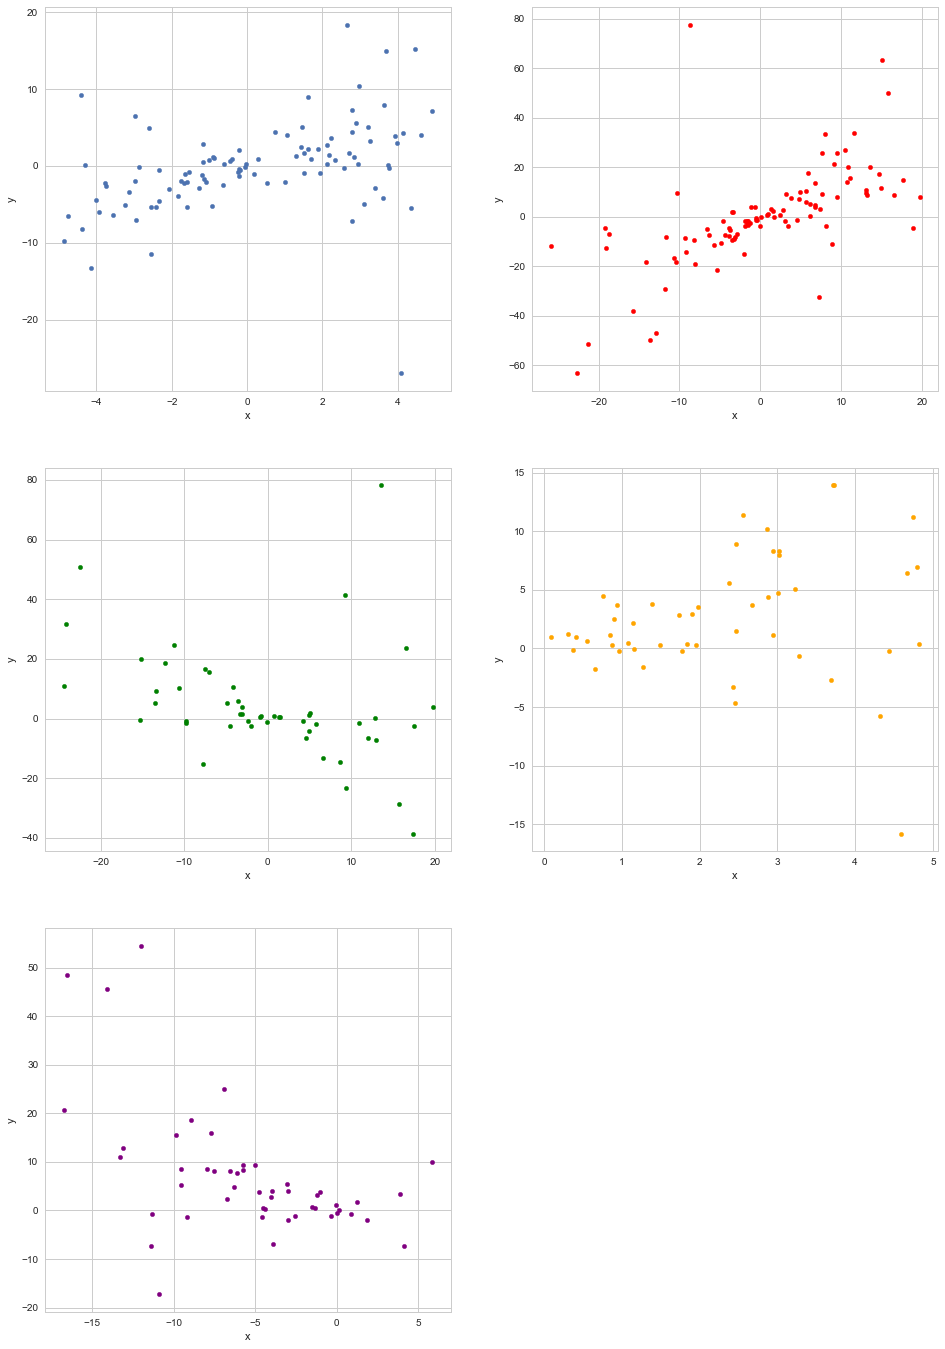

In [3]:
fig = plt.figure(figsize=[16,24])
ax1 = fig.add_subplot(321)
data[1].plot.scatter('x','y', ax=ax1);
ax2 = fig.add_subplot(322)
data[2].plot.scatter('x','y', ax=ax2, color='red');
ax3 = fig.add_subplot(323)
data[3].plot.scatter('x','y', ax=ax3, color='green');
ax4 = fig.add_subplot(324)
data[4].plot.scatter('x','y', ax=ax4, color='orange');
ax5 = fig.add_subplot(325)
data[5].plot.scatter('x','y', ax=ax5, color='purple');

# fig, axes = plt.subplots(3, 2, figsize=[16,24])
# data1.plot.scatter('x','y', ax=axes[0,0]);
# data2.plot.scatter('x','y', ax=axes[0,1], color='red');
# data3.plot.scatter('x','y', ax=axes[1,0], color='green');
# data4.plot.scatter('x','y', ax=axes[1,1], color='orange');
# data5.plot.scatter('x','y', ax=axes[2,0], color = 'black');

### 4. Modeling data

#### 4.1 Getting data statistics

//anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


,x,y
count,100.000000,100.000000
mean,0.178471,-0.112328
std,2.675848,5.820218
min,-4.866097,-27.008035
25%,-1.769180,-2.698194
50%,-0.121893,-0.179928
75%,2.671934,2.565632
max,4.919061,18.387174


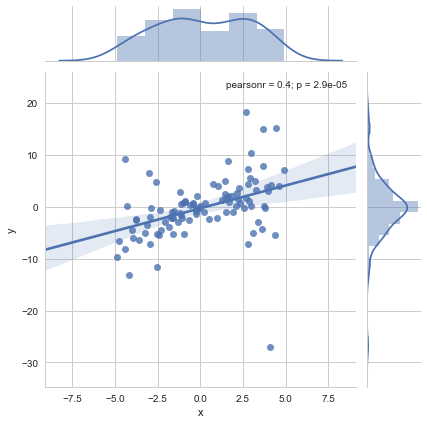

In [4]:
sns.jointplot(x='x', y='y', data=data[1], kind='reg');
data[1].describe()

#### 4.2 Exploratory Data Analysis

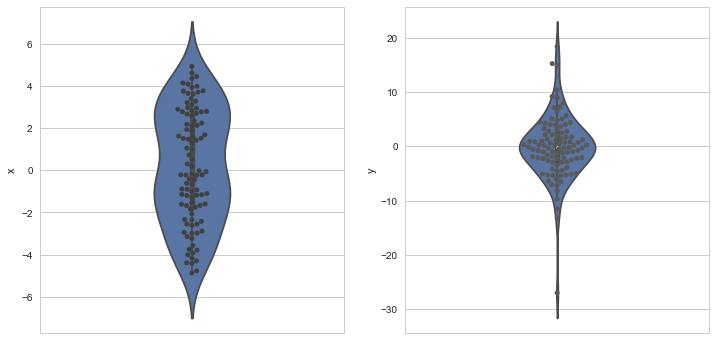

In [5]:
X = data[1].x
y = data[1].y

X = sm.add_constant(X)

fig = plt.figure(figsize=[12,6])
ax1 = fig.add_subplot(121)
_ = sns.violinplot(X.x, orient='v', width=0.25, ax = ax1)
_ = sns.swarmplot(x=X.x, orient='v', color='.25', ax = ax1)

ax2 = fig.add_subplot(122)
ax = sns.violinplot(y, orient='v', width=0.25, ax = ax2)
ax = sns.swarmplot(x=y, orient='v', color='.35', ax = ax2)

# for patch in ax.artists:
#     r, g, b, a = patch.get_facecolor()
#     patch.set_facecolor((r, g, b, .2))

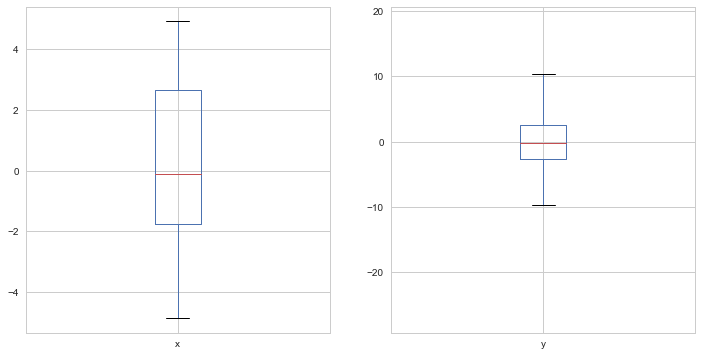

In [6]:
fig = plt.figure(figsize=[12,6])
ax1 = fig.add_subplot(121)
X.boxplot(column='x',ax = ax1);
ax2 = fig.add_subplot(122)
pd.DataFrame(y).boxplot(column='y', ax = ax2);

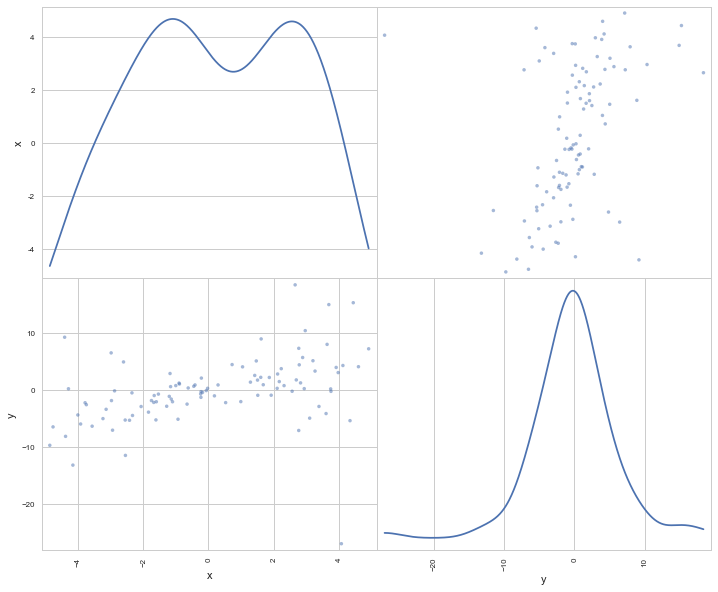

In [7]:
_ = pd.plotting.scatter_matrix(data[1], edgecolor='none', figsize=[12, 10], diagonal='kde')

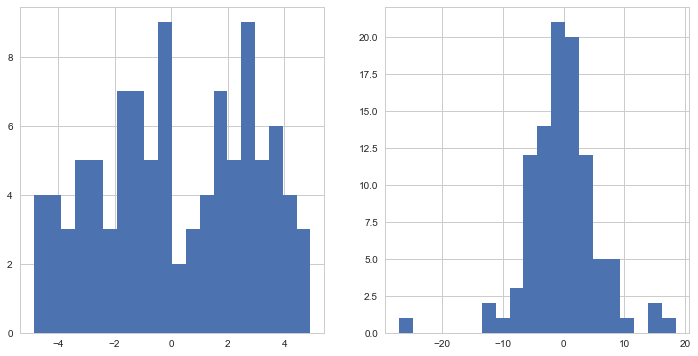

In [8]:
fig = plt.figure(figsize=[12,6])
ax1 = fig.add_subplot(121)
X.x.hist(bins=20, ax = ax1)
ax2 = fig.add_subplot(122)
y.hist(bins=20, ax = ax2);

#### 4.3)
Fit a simple linear regression model without validating the assumptions just in order to get some inights on the assumptions that we need to check.

In [9]:
lm = sm.OLS(y, X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     19.22
Date:                Mon, 19 Mar 2018   Prob (F-statistic):           2.93e-05
Time:                        00:07:25   Log-Likelihood:                -308.57
No. Observations:                 100   AIC:                             621.1
Df Residuals:                      98   BIC:                             626.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2695      0.536     -0.503      0.616      -1.333       0.794
x              0.8808      0.201      4.384      0.000       0.482       1.279
==============================================================================
Omnibus:                       51.887   Durbin-Watson:                   2.329
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              472.400
Skew:                          -1.324   Prob(JB):                    2.63e-103
Kurtosis:                      13.313   Cond. No.                         2.68
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 4.4 Checking Linear Regression Assumptions

1. Homoscedasticity
2. Normality
3. Non-collinearity
4. Non-ouliers
5. Linearity

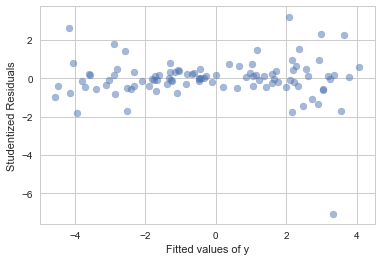

In [10]:
student_resid = lm.outlier_test()['student_resid']
predictions = lm.fittedvalues
plt.scatter(predictions, student_resid, alpha=0.5);
plt.xlabel('Fitted values of y')
plt.ylabel('Studentized Residuals')
plt.show()

In [11]:
print 'Breusch-Pagan Lagrange Multiplier test for heteroscedasticity'
print '(lm, lm_pvalue, fvalue, f_pvalue)'
print hetero_test(y, X)

Breusch-Pagan Lagrange Multiplier test for heteroscedasticity
(lm, lm_pvalue, fvalue, f_pvalue)
(2.538132977338692, 0.11112611865693942, 2.5521472077008, 0.11336401588880028)


#### Q-Q plot to check normality

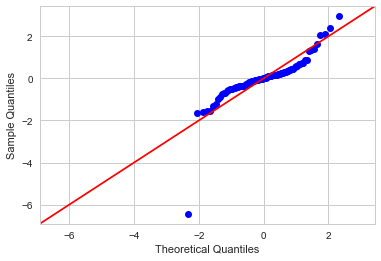

In [12]:
sm.graphics.qqplot(student_resid, line='45', fit=True)
plt.show()

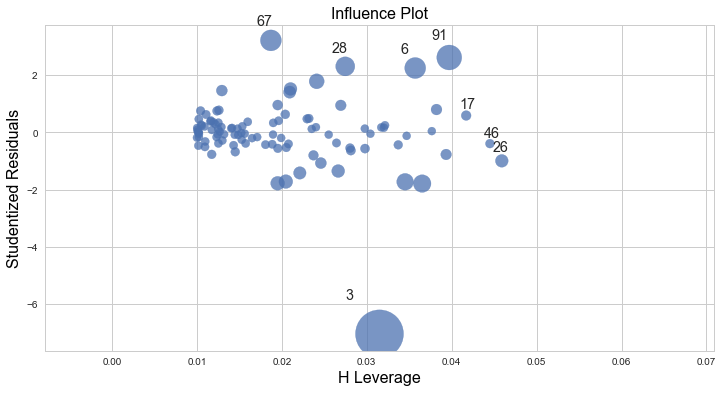

In [13]:
fig = plt.figure(figsize=[12,6])
ax1 = fig.add_subplot(111)
sm.graphics.influence_plot(lm, ax = ax1, criterion="cooks");

***Regression Diganostics Results:*** Obviously our data is suffering from non-normality and heteroscedasticity and has outliers.

#### Transforming y to fix non-normality and heteroscedacity

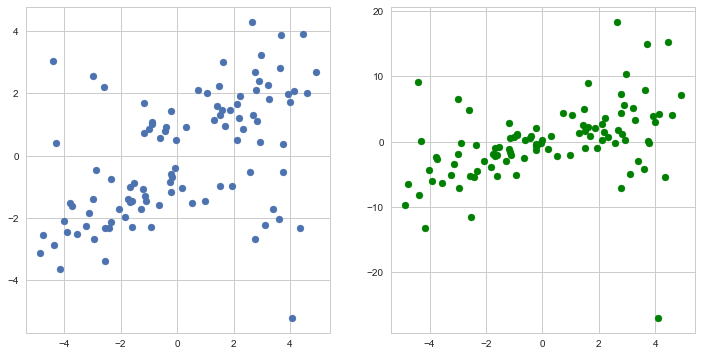

In [14]:
# y_new = np.log10(y - y.min() + 1)
# y_new = np.sqrt(y - y.min())  
# y_new = np.sqrt(abs(y - y.mean()))*np.sign(y - y.mean())
# y_new = np.log10(abs(y - y.mean()))*np.sign(y - y.mean())
# y_new = np.log10(abs(y))*np.sign(y)
# y_new = np.cbrt(y)

y_new = np.sqrt(abs(y))*np.sign(y)
# y_new = np.sqrt(np.sqrt(abs(y)))*np.sign(y)
X_new = X

fig = plt.figure(figsize=[12,6])
ax1 = fig.add_subplot(121)
ax1.scatter(X_new.x, y_new);
ax2 = fig.add_subplot(122)
ax2.scatter(X.x, y, color='green');

#### Removing the outlier:

Text(0,0.5,'y')

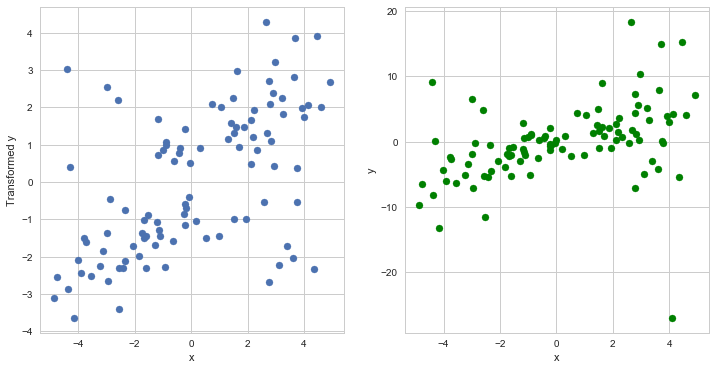

In [15]:
outlier = y_new.index[y_new==y_new.min()]
X_new = X_new.drop(outlier)
y_new = y_new.drop(outlier)
fig = plt.figure(figsize=[12,6])
ax1 = fig.add_subplot(121)
ax1.scatter(X_new.x, y_new);
plt.xlabel('x')
plt.ylabel('Transformed y')
ax2 = fig.add_subplot(122)
ax2.scatter(X.x, y, color='green');
plt.xlabel('x')
plt.ylabel('y')

#### Checking heteroscedacity

In [16]:
print 'Breusch-Pagan Lagrange Multiplier test for heteroscedasticity'
print '(lm, lm_pvalue, fvalue, f_pvalue)'
print hetero_test(y_new, X_new)

Breusch-Pagan Lagrange Multiplier test for heteroscedasticity
(lm, lm_pvalue, fvalue, f_pvalue)
(0.027063422288190253, 0.8693299569941146, 0.026523937277472254, 0.8709661298956589)


In [17]:
lm_log = sm.OLS(y_new, X_new).fit()
b, a = lm_log.params
lm_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     45.51
Date:                Mon, 19 Mar 2018   Prob (F-statistic):           1.10e-09
Time:                        00:07:27   Log-Likelihood:                -186.38
No. Observations:                  99   AIC:                             376.8
Df Residuals:                      97   BIC:                             381.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0604      0.162     -0.374      0.709      -0.381       0.260
x              0.4115      0.061      6.746      0.000       0.290       0.533
==============================================================================
Omnibus:                        1.979   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.372   Jarque-Bera (JB):                1.464
Skew:                           0.124   Prob(JB):                        0.481
Kurtosis:                       3.542   Cond. No.                         2.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

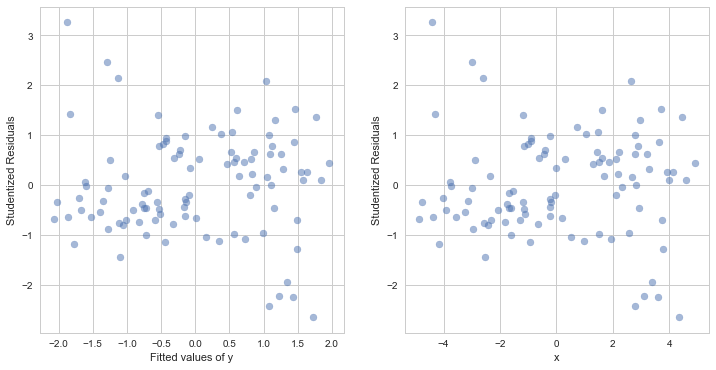

In [18]:
student_resid = lm_log.outlier_test()['student_resid']
predictions = lm_log.fittedvalues
fig = plt.figure(figsize=[12,6])
ax1 = fig.add_subplot(121)
plt.scatter(predictions, student_resid, alpha=0.5);
plt.xlabel('Fitted values of y')
plt.ylabel('Studentized Residuals')
ax2 = fig.add_subplot(122)
plt.scatter(X_new.x, student_resid, alpha=0.5);
plt.xlabel('x')
plt.ylabel('Studentized Residuals')
plt.show()

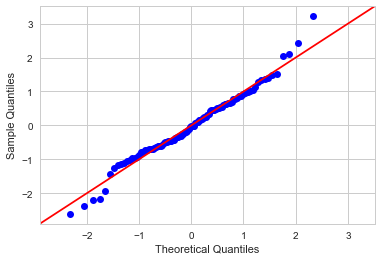

In [19]:
sm.graphics.qqplot(student_resid, line='45', fit=True)
plt.show()

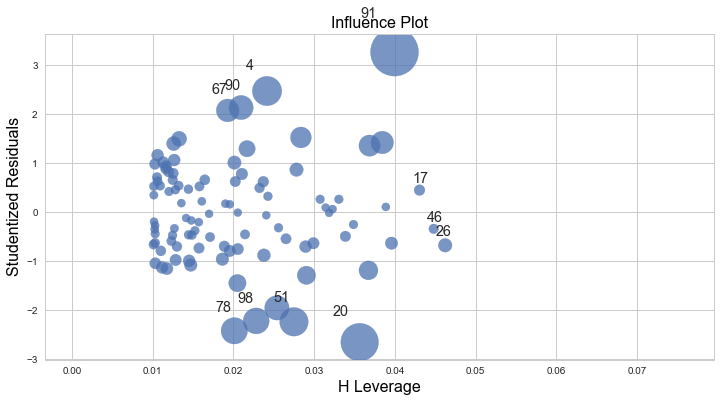

In [20]:
fig, ax = plt.subplots(figsize=(12,6))
fig = sm.graphics.influence_plot(lm_log, ax=ax, criterion="cooks")

0.411478881427 -0.0603991853675


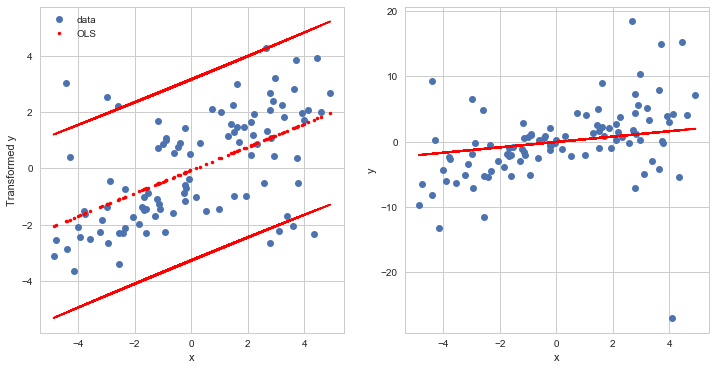

In [21]:
prstd, iv_l, iv_u = wls_prediction_std(lm_log)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.plot(X_new.x, y_new, 'o', label="data")
ax1.plot(X_new.x, lm_log.fittedvalues, 'r.', label="OLS")
ax1.plot(X_new.x, iv_u, 'r-')
ax1.plot(X_new.x, iv_l, 'r-')
ax1.legend(loc='best');
ax1.set_xlabel('x')
ax1.set_ylabel('Transformed y')

ax2.plot(X.x, y, 'o', label="data");
ax2.plot(X.x, a*X.x + b, 'r-', label="OLS");
ax2.set_xlabel('x')
ax2.set_ylabel('y');
print a, b

In [22]:
data[1] = pd.concat([X_new.x, y_new], axis=1)

,x,y
count,100.000000,100.000000
mean,0.473652,0.213075
std,9.805974,19.980543
min,-25.923277,-63.359915
25%,-4.615964,-7.803607
50%,-0.019552,-0.839115
75%,7.453385,8.893503
max,19.713374,77.642259


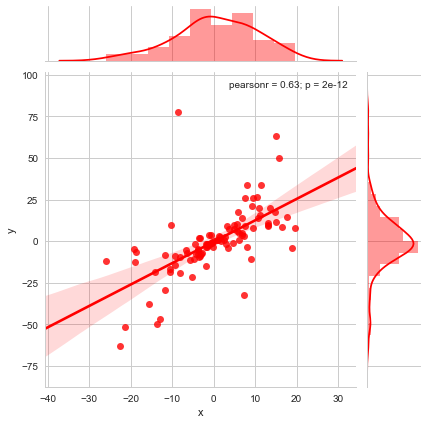

In [23]:
sns.jointplot(x='x', y='y', data=data[2], kind='reg', color='red');
data[2].describe()

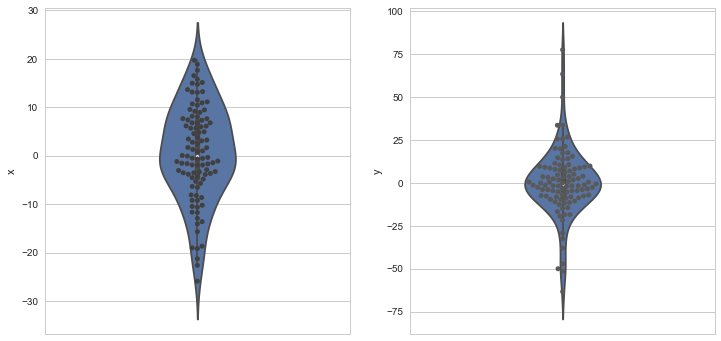

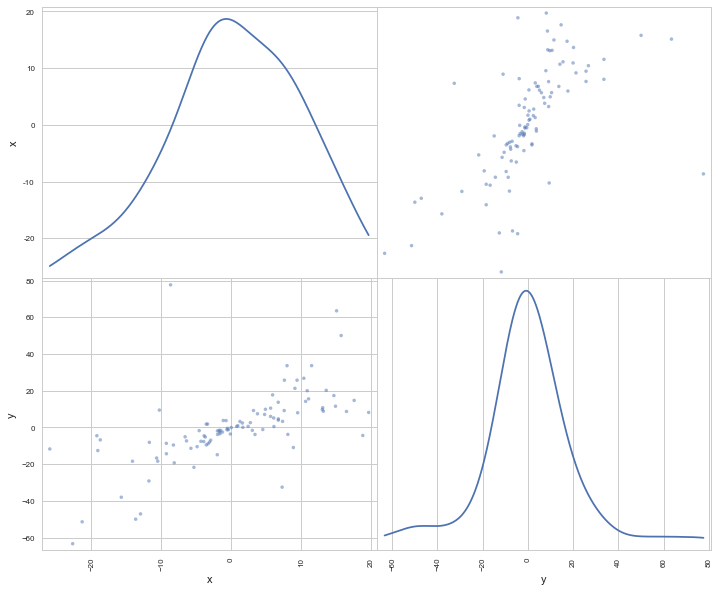

In [24]:
X = data[2].x
y = data[2].y

X = sm.add_constant(X)

fig = plt.figure(figsize=[12,6])
ax1 = fig.add_subplot(121)
_ = sns.violinplot(X.x, orient='v', width=0.25, ax = ax1)
_ = sns.swarmplot(x=X.x, orient='v', color='.25', ax = ax1)

ax2 = fig.add_subplot(122)
ax = sns.violinplot(y, orient='v', width=0.25, ax = ax2)
ax = sns.swarmplot(x=y, orient='v', color='.35', ax = ax2)

_ = pd.plotting.scatter_matrix(data[2], edgecolor='none', figsize=[12, 10], diagonal='kde')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     64.81
Date:                Mon, 19 Mar 2018   Prob (F-statistic):           1.98e-12
Time:                        00:07:29   Log-Likelihood:                -415.48
No. Observations:                 100   AIC:                             835.0
Df Residuals:                      98   BIC:                             840.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3959      1.560     -0.254      0.8

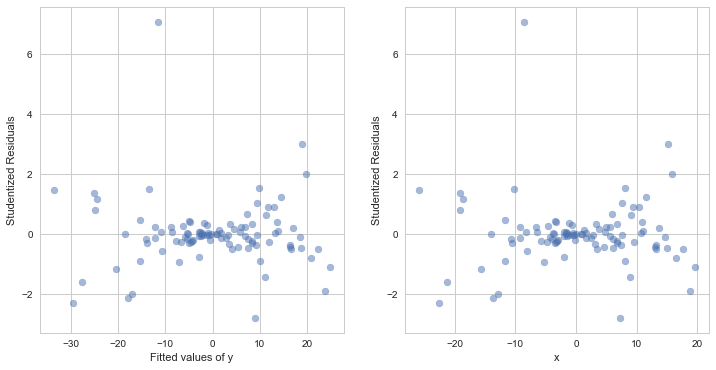

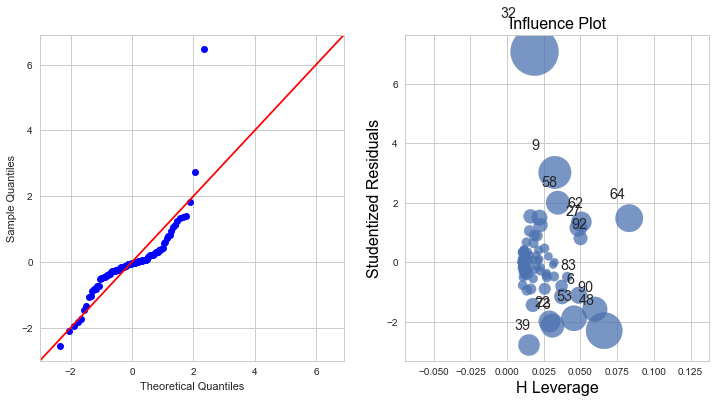

In [25]:
lm = sm.OLS(y, X).fit()
print lm.summary()
print 
print 'Breusch-Pagan Lagrange Multiplier test for heteroscedasticity'
print '(lm, lm_pvalue, fvalue, f_pvalue)'
print hetero_test(y, X)


student_resid = lm.outlier_test()['student_resid']
predictions = lm.fittedvalues


fig = plt.figure(figsize=[12,6])
ax1 = fig.add_subplot(121)
plt.scatter(predictions, student_resid, alpha=0.5);
plt.xlabel('Fitted values of y')
plt.ylabel('Studentized Residuals')
ax2 = fig.add_subplot(122)
plt.scatter(X.x, student_resid, alpha=0.5);
plt.xlabel('x')
plt.ylabel('Studentized Residuals')
plt.show()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[12,6])
sm.graphics.qqplot(student_resid, line='45', fit=True, ax=ax1)
sm.graphics.influence_plot(lm, ax=ax2, criterion="cooks")
plt.show()

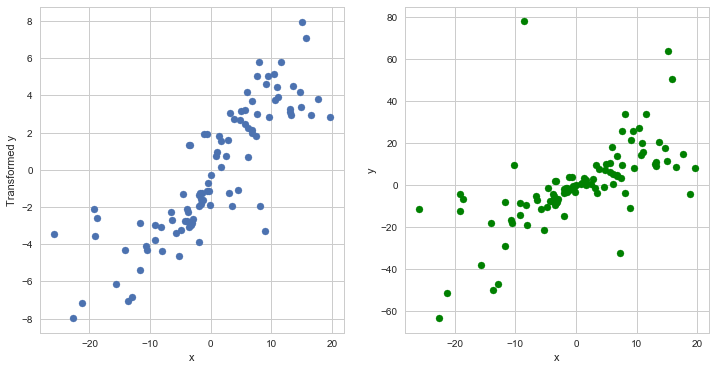

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     233.6
Date:                Mon, 19 Mar 2018   Prob (F-statistic):           3.17e-27
Time:                        00:07:30   Log-Likelihood:                -196.80
No. Observations:                  96   AIC:                             397.6
Df Residuals:                      94   BIC:                             402.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2012      0.194     -1.037      0.3

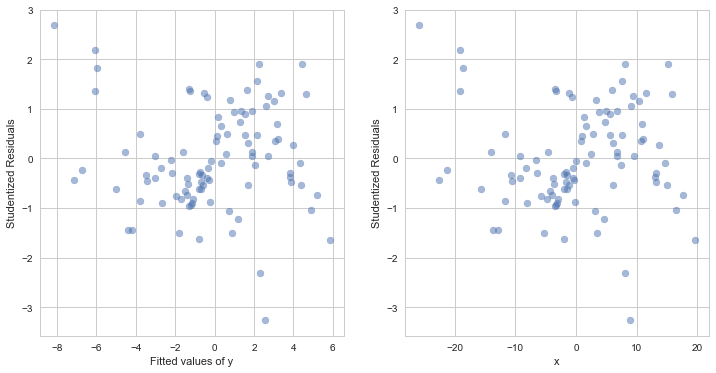

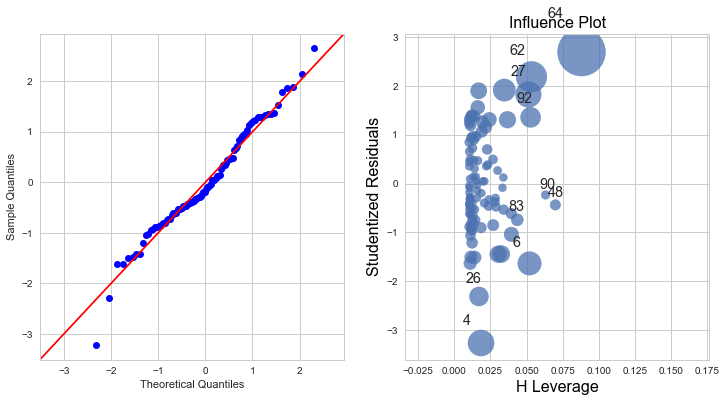

In [26]:
y_new = np.sqrt(abs(y))*np.sign(y)
X_new = X

y_new = y_new.drop([32, 39, 53, 12])
X_new = X_new.drop([32, 39, 53, 12])

fig = plt.figure(figsize=[12,6])
ax1 = fig.add_subplot(121)
ax1.scatter(X_new.x, y_new);
ax1.set_xlabel('x')
ax1.set_ylabel('Transformed y')
ax2 = fig.add_subplot(122)
ax2.scatter(X.x, y, color='green');
ax2.set_xlabel('x')
ax2.set_ylabel('y')
plt.show()

lm_log = sm.OLS(y_new, X_new).fit()
b, a = lm_log.params
print lm_log.summary()

print 'Breusch-Pagan Lagrange Multiplier test for heteroscedasticity'
print '(lm, lm_pvalue, fvalue, f_pvalue)'
print hetero_test(y_new, X_new)


student_resid = lm_log.outlier_test()['student_resid']
predictions = lm_log.fittedvalues
fig = plt.figure(figsize=[12,6])
ax1 = fig.add_subplot(121)
plt.scatter(predictions, student_resid, alpha=0.5);
plt.xlabel('Fitted values of y')
plt.ylabel('Studentized Residuals')
ax2 = fig.add_subplot(122)
plt.scatter(X_new.x, student_resid, alpha=0.5);
plt.xlabel('x')
plt.ylabel('Studentized Residuals')
plt.show()



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[12,6])
sm.graphics.qqplot(student_resid, line='45', fit=True, ax=ax1)
sm.graphics.influence_plot(lm_log, ax=ax2, criterion="cooks")
plt.show()



0.307121423018 -0.201173100306


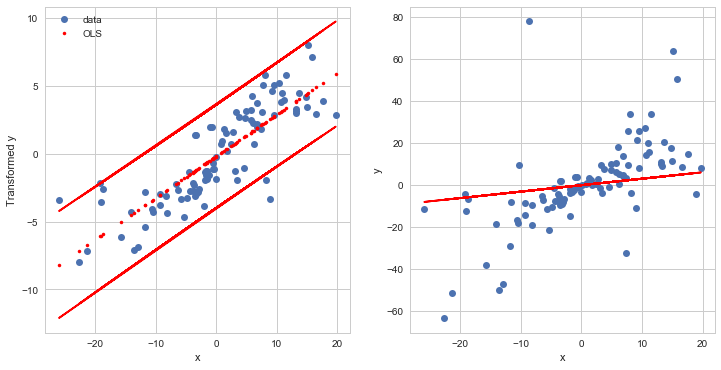

In [27]:
prstd, iv_l, iv_u = wls_prediction_std(lm_log)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.plot(X_new.x, y_new, 'o', label="data")
ax1.plot(X_new.x, lm_log.fittedvalues, 'r.', label="OLS")
ax1.plot(X_new.x, iv_u, 'r-')
ax1.plot(X_new.x, iv_l, 'r-')
ax1.legend(loc='best');
ax1.set_xlabel('x')
ax1.set_ylabel('Transformed y')

ax2.plot(X.x, y, 'o', label="data");
ax2.plot(X.x, a*X.x + b, 'r-', label="OLS");
ax2.set_xlabel('x')
ax2.set_ylabel('y');
print a, b

In [28]:
data[2] = pd.concat([X_new.x, y_new], axis=1)

,x,y
count,50.000000,50.000000
mean,-0.421341,4.401773
std,11.160999,18.686335
min,-24.423113,-38.677853
25%,-7.731586,-2.249828
50%,-0.841930,0.618328
75%,8.115973,9.969540
max,19.715720,78.281136


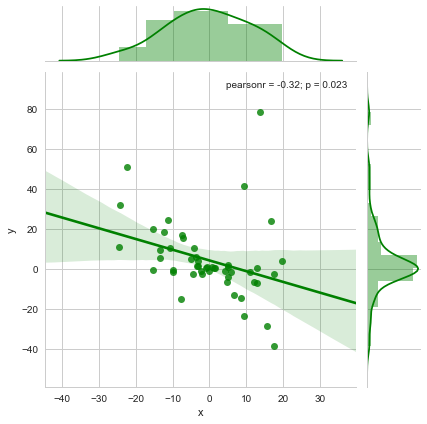

In [29]:
sns.jointplot(x='x', y='y', data=data[3], kind='reg', color='green');
data[3].describe()

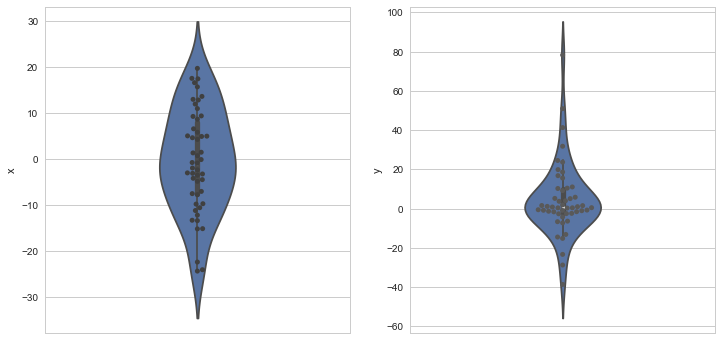

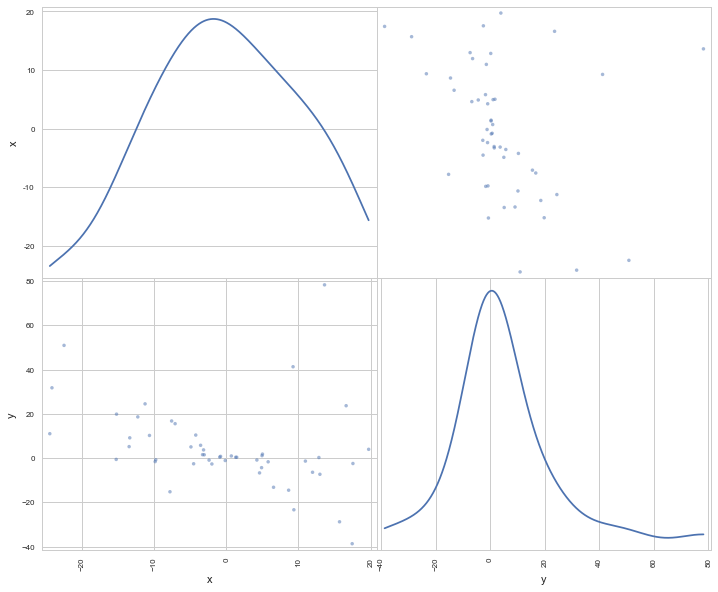

In [30]:
X = data[3].x
y = data[3].y

X = sm.add_constant(X)

fig = plt.figure(figsize=[12,6])
ax1 = fig.add_subplot(121)
_ = sns.violinplot(X.x, orient='v', width=0.25, ax = ax1)
_ = sns.swarmplot(x=X.x, orient='v', color='.25', ax = ax1)

ax2 = fig.add_subplot(122)
ax = sns.violinplot(y, orient='v', width=0.25, ax = ax2)
ax = sns.swarmplot(x=y, orient='v', color='.35', ax = ax2)

_ = pd.plotting.scatter_matrix(data[3], edgecolor='none', figsize=[12, 10], diagonal='kde')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     5.524
Date:                Mon, 19 Mar 2018   Prob (F-statistic):             0.0229
Time:                        00:07:32   Log-Likelihood:                -214.11
No. Observations:                  50   AIC:                             432.2
Df Residuals:                      48   BIC:                             436.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1752      2.530      1.650      0.1

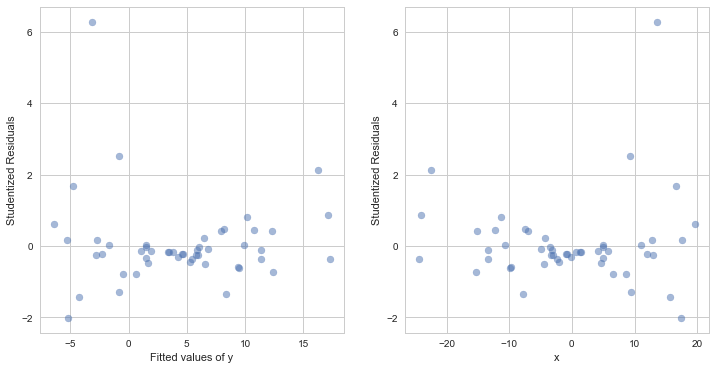

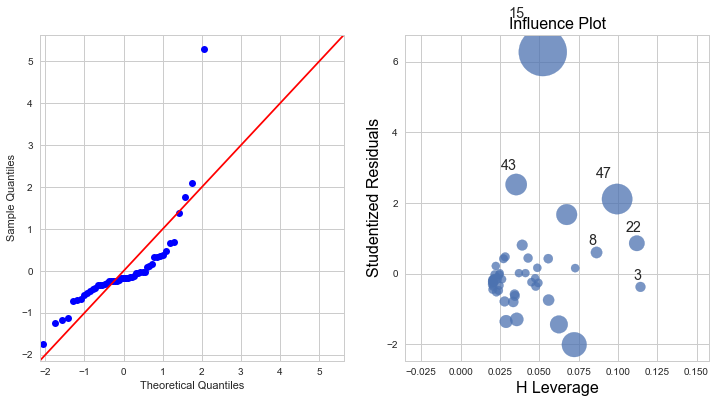

In [31]:
lm = sm.OLS(y, X).fit()
print lm.summary()
print 
print 'Breusch-Pagan Lagrange Multiplier test for heteroscedasticity'
print '(lm, lm_pvalue, fvalue, f_pvalue)'
print hetero_test(y, X)


student_resid = lm.outlier_test()['student_resid']
predictions = lm.fittedvalues


fig = plt.figure(figsize=[12,6])
ax1 = fig.add_subplot(121)
plt.scatter(predictions, student_resid, alpha=0.5);
plt.xlabel('Fitted values of y')
plt.ylabel('Studentized Residuals')
ax2 = fig.add_subplot(122)
plt.scatter(X.x, student_resid, alpha=0.5);
plt.xlabel('x')
plt.ylabel('Studentized Residuals')
plt.show()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[12,6])
sm.graphics.qqplot(student_resid, line='45', fit=True, ax=ax1)
sm.graphics.influence_plot(lm, ax=ax2, criterion="cooks")
plt.show()

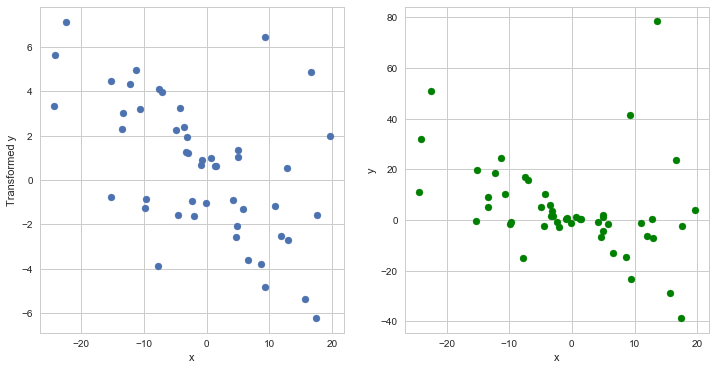

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     19.23
Date:                Mon, 19 Mar 2018   Prob (F-statistic):           6.48e-05
Time:                        00:07:33   Log-Likelihood:                -116.81
No. Observations:                  49   AIC:                             237.6
Df Residuals:                      47   BIC:                             241.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4605      0.384      1.200      0.2

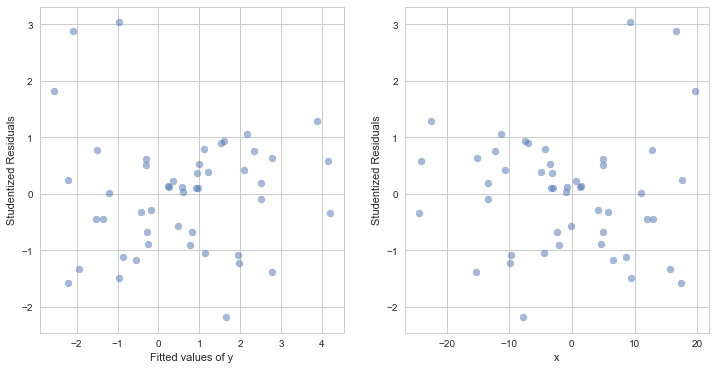

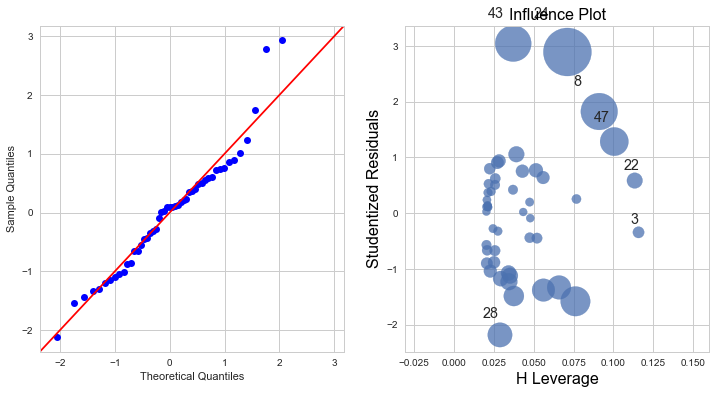

In [32]:
y_new = np.sqrt(abs(y))*np.sign(y)
# y_new, _ = boxcox(y - y.min() + 1)
# y_new = pd.DataFrame(data=y_new, columns=['y'])
X_new = X

y_new = y_new.drop([15])
X_new = X_new.drop([15])

fig = plt.figure(figsize=[12,6])
ax1 = fig.add_subplot(121)
ax1.scatter(X_new.x, y_new);
ax1.set_xlabel('x')
ax1.set_ylabel('Transformed y')
ax2 = fig.add_subplot(122)
ax2.scatter(X.x, y, color='green');
ax2.set_xlabel('x')
ax2.set_ylabel('y')
plt.show()

lm_log = sm.OLS(y_new, X_new).fit()
b, a = lm_log.params
print lm_log.summary()

print 'Breusch-Pagan Lagrange Multiplier test for heteroscedasticity'
print '(lm, lm_pvalue, fvalue, f_pvalue)'
print hetero_test(y_new, X_new)


student_resid = lm_log.outlier_test()['student_resid']
predictions = lm_log.fittedvalues
fig = plt.figure(figsize=[12,6])
ax1 = fig.add_subplot(121)
plt.scatter(predictions, student_resid, alpha=0.5);
plt.xlabel('Fitted values of y')
plt.ylabel('Studentized Residuals')
ax2 = fig.add_subplot(122)
plt.scatter(X_new.x, student_resid, alpha=0.5);
plt.xlabel('x')
plt.ylabel('Studentized Residuals')
plt.show()



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[12,6])
sm.graphics.qqplot(student_resid, line='45', fit=True, ax=ax1)
sm.graphics.influence_plot(lm_log, ax=ax2, criterion="cooks")
plt.show()

-0.152982676282 0.460547089724


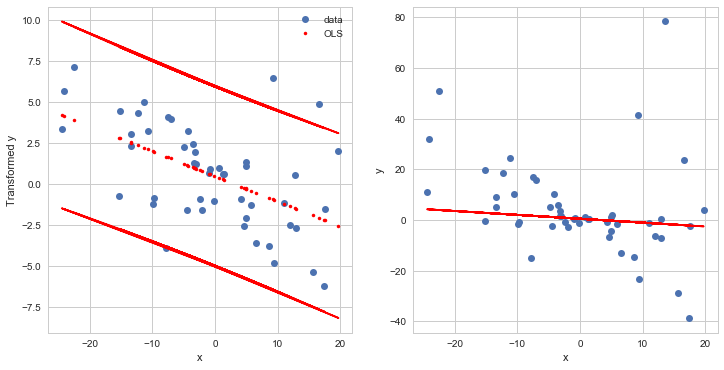

In [33]:
prstd, iv_l, iv_u = wls_prediction_std(lm_log)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.plot(X_new.x, y_new, 'o', label="data")
ax1.plot(X_new.x, lm_log.fittedvalues, 'r.', label="OLS")
ax1.plot(X_new.x, iv_u, 'r-')
ax1.plot(X_new.x, iv_l, 'r-')
ax1.legend(loc='best');
ax1.set_xlabel('x')
ax1.set_ylabel('Transformed y')

ax2.plot(X.x, y, 'o', label="data");
ax2.plot(X.x, a*X.x + b, 'r-', label="OLS");
ax2.set_xlabel('x')
ax2.set_ylabel('y');
print a, b

In [34]:
data[3] = pd.concat([X_new.x, y_new], axis=1)

,x,y
count,50.000000,50.000000
mean,2.291112,2.599265
std,1.363023,5.196983
min,0.091918,-15.828510
25%,1.095533,0.062211
50%,2.403090,1.351297
75%,3.024151,4.982735
max,4.822850,13.952864


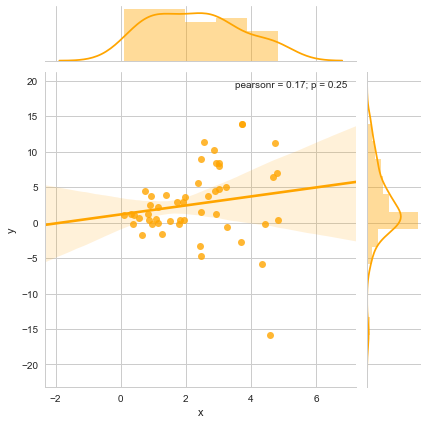

In [35]:
sns.jointplot(x='x', y='y', data=data[4], kind='reg', color='orange');
data[4].describe()

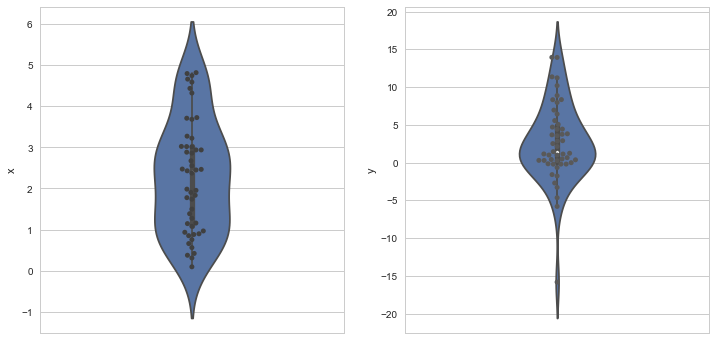

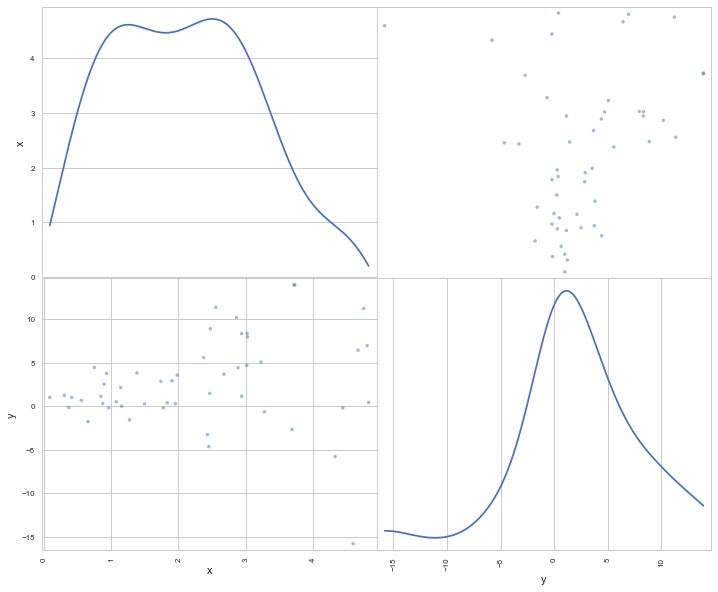

In [95]:
X = data[4].x
y = data[4].y

X = sm.add_constant(X)

fig = plt.figure(figsize=[12,6])
ax1 = fig.add_subplot(121)
_ = sns.violinplot(X.x, orient='v', width=0.25, ax = ax1)
_ = sns.swarmplot(x=X.x, orient='v', color='.25', ax = ax1)

ax2 = fig.add_subplot(122)
ax = sns.violinplot(y, orient='v', width=0.25, ax = ax2)
ax = sns.swarmplot(x=y, orient='v', color='.35', ax = ax2)

_ = pd.plotting.scatter_matrix(data[4], edgecolor='none', figsize=[12, 10], diagonal='kde')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.362
Date:                Mon, 19 Mar 2018   Prob (F-statistic):              0.249
Time:                        00:34:53   Log-Likelihood:                -152.15
No. Observations:                  50   AIC:                             308.3
Df Residuals:                      48   BIC:                             312.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1481      1.443      0.796      0.4

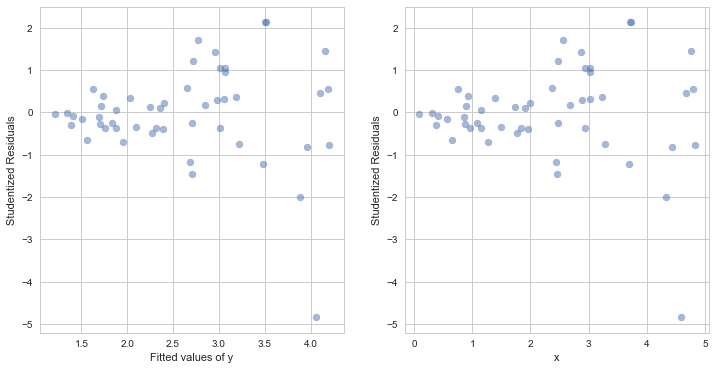

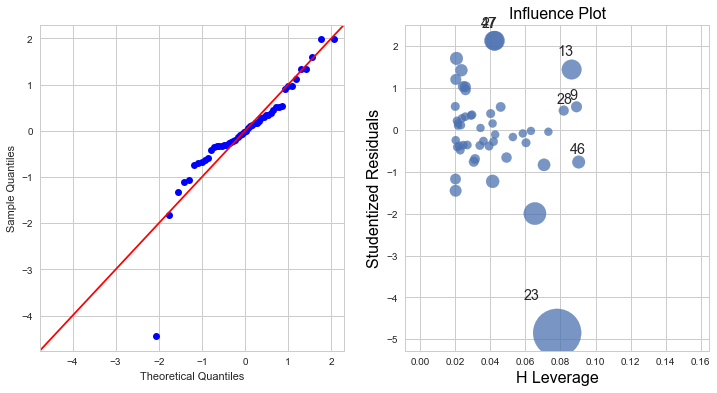

In [96]:
lm = sm.OLS(y, X).fit()
print lm.summary()
print 
print 'Breusch-Pagan Lagrange Multiplier test for heteroscedasticity'
print '(lm, lm_pvalue, fvalue, f_pvalue)'
print hetero_test(y, X)


student_resid = lm.outlier_test()['student_resid']
predictions = lm.fittedvalues


fig = plt.figure(figsize=[12,6])
ax1 = fig.add_subplot(121)
plt.scatter(predictions, student_resid, alpha=0.5);
plt.xlabel('Fitted values of y')
plt.ylabel('Studentized Residuals')
ax2 = fig.add_subplot(122)
plt.scatter(X.x, student_resid, alpha=0.5);
plt.xlabel('x')
plt.ylabel('Studentized Residuals')
plt.show()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[12,6])
sm.graphics.qqplot(student_resid, line='45', fit=True, ax=ax1)
sm.graphics.influence_plot(lm, ax=ax2, criterion="cooks")
plt.show()

In [97]:
from sklearn.preprocessing import QuantileTransformer

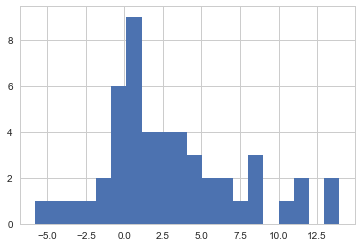

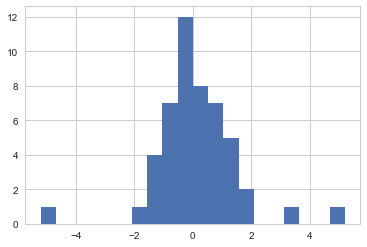

In [98]:
y = y.drop([23])
X = X.drop([23])
X = X.reset_index(drop=True)
plt.hist(y, bins=20)
y_new = (y.values).reshape(-1, 1)
qt = QuantileTransformer(n_quantiles=10, random_state=0, output_distribution='normal')
y_new = qt.fit_transform(y_new)
plt.figure()
plt.hist(y_new, bins=20)
plt.show()

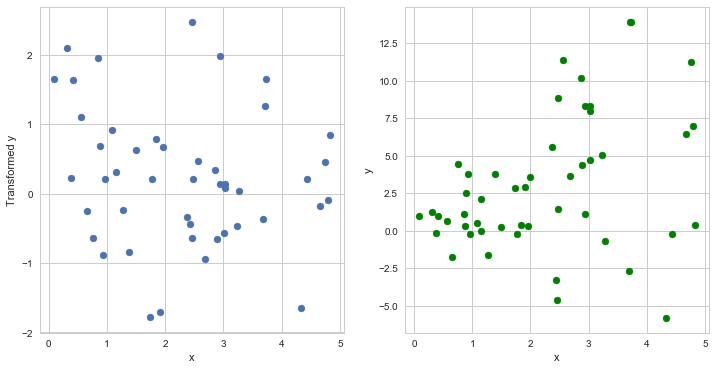

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.458
Date:                Mon, 19 Mar 2018   Prob (F-statistic):              0.234
Time:                        00:34:58   Log-Likelihood:                -63.788
No. Observations:                  46   AIC:                             131.6
Df Residuals:                      44   BIC:                             135.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5370      0.291      1.848      0.0

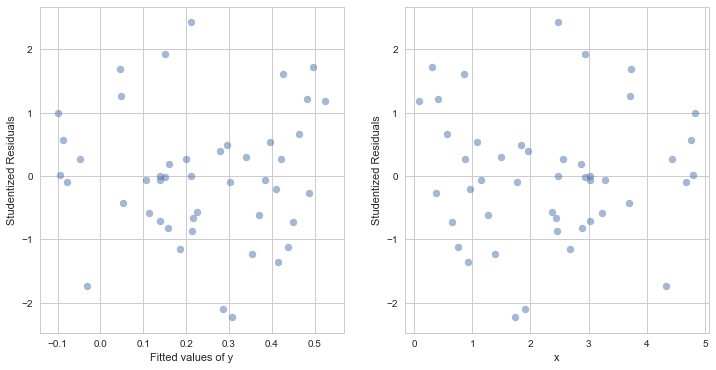

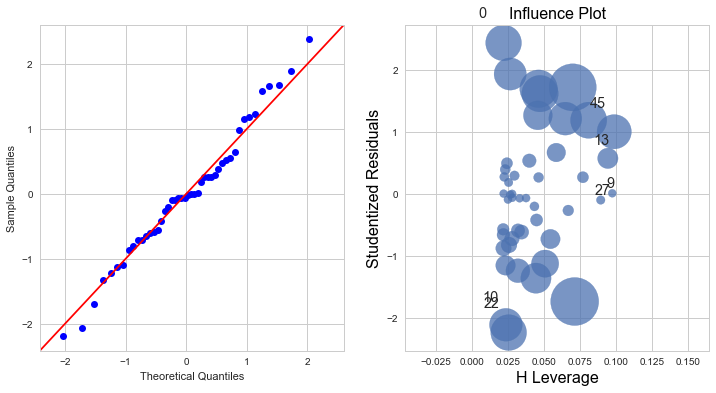

In [99]:
# hetero_test = sm.stats.het_goldfeldquandt
# y_new = np.sqrt(abs(y))*np.sign(y)
# from sklearn.preprocessing import quantile_transform
# y_tmp = y.values
# y_new = quantile_transform(y_tmp.reshape(-1, 1), random_state=0)
y_new = pd.DataFrame(data=y_new, columns=['y'])

y_new = np.log(abs(y_new))*np.sign(y_new)
# y_new = np.sqrt(abs(y))*np.sign(y)

X_new = X

y_new = y_new.drop([20, 8, 35])
X_new = X_new.drop([20, 8, 35])

fig = plt.figure(figsize=[12,6])
ax1 = fig.add_subplot(121)
ax1.scatter(X_new.x, y_new);
ax1.set_xlabel('x')
ax1.set_ylabel('Transformed y')
ax2 = fig.add_subplot(122)
ax2.scatter(X.x, y, color='green');
ax2.set_xlabel('x')
ax2.set_ylabel('y')
plt.show()

lm_log = sm.OLS(y_new, X_new).fit()
b, a = lm_log.params
print lm_log.summary()

print 'Breusch-Pagan Lagrange Multiplier test for heteroscedasticity'
print '(lm, lm_pvalue, fvalue, f_pvalue)'
print hetero_test(y_new, X_new)


student_resid = lm_log.outlier_test()['student_resid']
predictions = lm_log.fittedvalues
fig = plt.figure(figsize=[12,6])
ax1 = fig.add_subplot(121)
plt.scatter(predictions, student_resid, alpha=0.5);
plt.xlabel('Fitted values of y')
plt.ylabel('Studentized Residuals')
ax2 = fig.add_subplot(122)
plt.scatter(X_new.x, student_resid, alpha=0.5);
plt.xlabel('x')
plt.ylabel('Studentized Residuals')
plt.show()



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[12,6])
sm.graphics.qqplot(student_resid, line='45', fit=True, ax=ax1)
sm.graphics.influence_plot(lm_log, ax=ax2, criterion="cooks")
plt.show()

-0.131690046702 0.537040091186


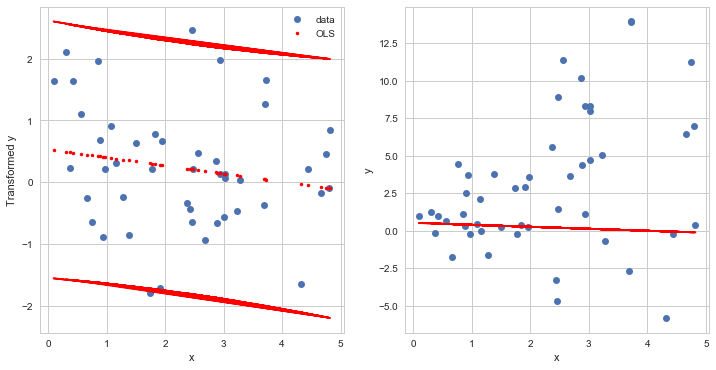

In [100]:
prstd, iv_l, iv_u = wls_prediction_std(lm_log)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.plot(X_new.x, y_new, 'o', label="data")
ax1.plot(X_new.x, lm_log.fittedvalues, 'r.', label="OLS")
ax1.plot(X_new.x, iv_u, 'r-')
ax1.plot(X_new.x, iv_l, 'r-')
ax1.legend(loc='best');
ax1.set_xlabel('x')
ax1.set_ylabel('Transformed y')

ax2.plot(X.x, y, 'o', label="data");
ax2.plot(X.x, a*X.x + b, 'r-', label="OLS");
ax2.set_xlabel('x')
ax2.set_ylabel('y');
print a, b

In [101]:
data[4] = pd.concat([X_new.x, y_new], axis=1)

,x,y
count,50.000000,50.000000
mean,-5.364524,6.909975
std,5.253889,13.222342
min,-16.740024,-17.285211
25%,-9.128192,-0.325283
50%,-4.890221,3.785614
75%,-1.398920,9.109861
max,5.861221,54.599125


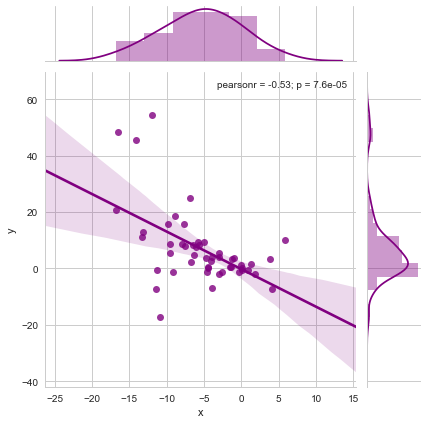

In [102]:
sns.jointplot(x='x', y='y', data=data[5], kind='reg', color='purple');
data[5].describe()

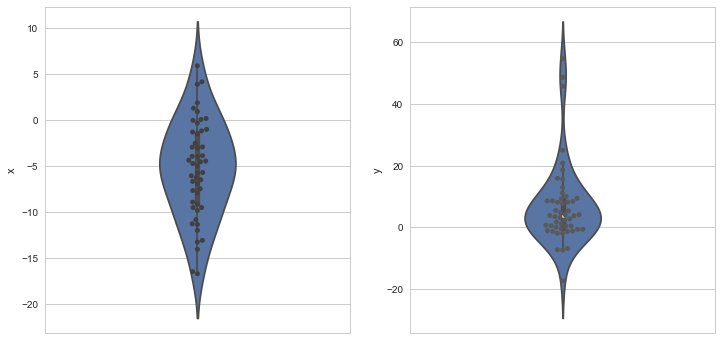

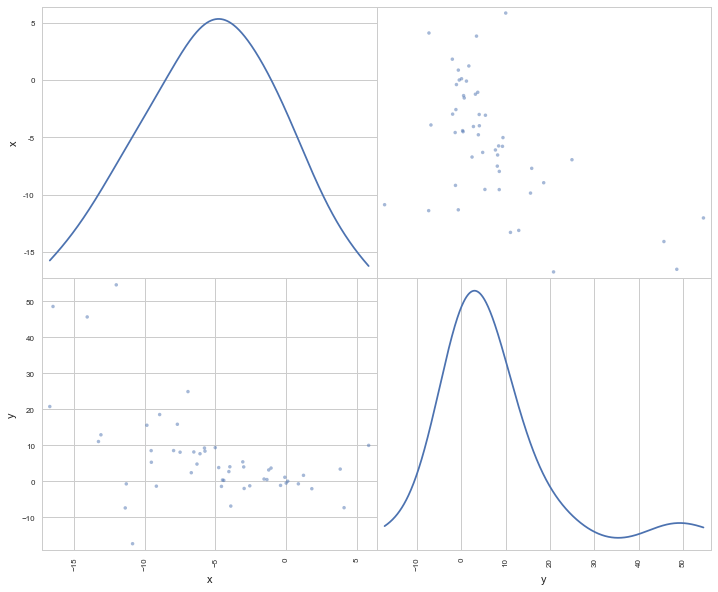

In [103]:
X = data[5].x
y = data[5].y

X = sm.add_constant(X)

fig = plt.figure(figsize=[12,6])
ax1 = fig.add_subplot(121)
_ = sns.violinplot(X.x, orient='v', width=0.25, ax = ax1)
_ = sns.swarmplot(x=X.x, orient='v', color='.25', ax = ax1)

ax2 = fig.add_subplot(122)
ax = sns.violinplot(y, orient='v', width=0.25, ax = ax2)
ax = sns.swarmplot(x=y, orient='v', color='.35', ax = ax2)

_ = pd.plotting.scatter_matrix(data[5], edgecolor='none', figsize=[12, 10], diagonal='kde')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     18.72
Date:                Mon, 19 Mar 2018   Prob (F-statistic):           7.63e-05
Time:                        00:35:30   Log-Likelihood:                -191.30
No. Observations:                  50   AIC:                             386.6
Df Residuals:                      48   BIC:                             390.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2413      2.302     -0.105      0.9

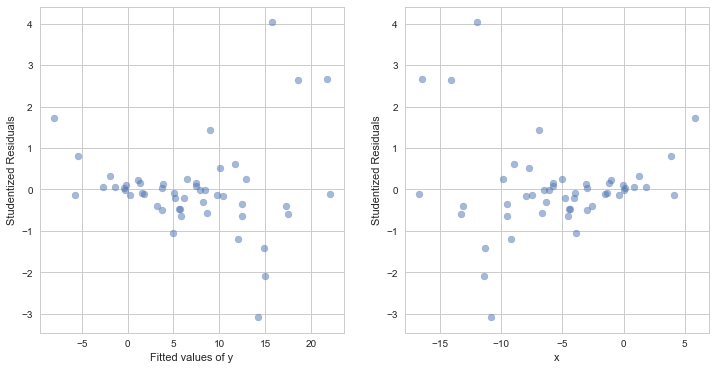

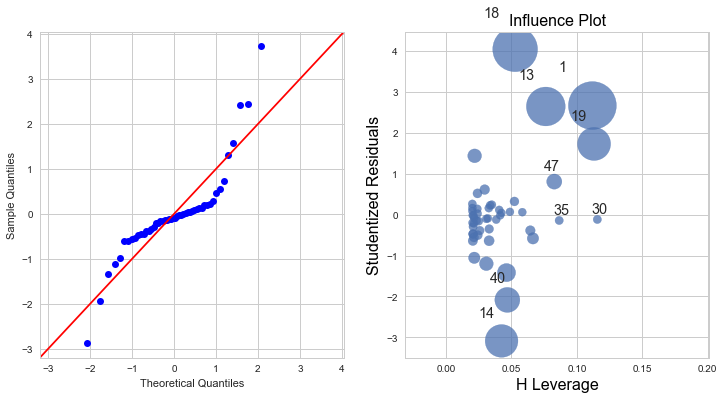

In [104]:
lm = sm.OLS(y, X).fit()
print lm.summary()
print 
print 'Breusch-Pagan Lagrange Multiplier test for heteroscedasticity'
print '(lm, lm_pvalue, fvalue, f_pvalue)'
print hetero_test(y, X)


student_resid = lm.outlier_test()['student_resid']
predictions = lm.fittedvalues


fig = plt.figure(figsize=[12,6])
ax1 = fig.add_subplot(121)
plt.scatter(predictions, student_resid, alpha=0.5);
plt.xlabel('Fitted values of y')
plt.ylabel('Studentized Residuals')
ax2 = fig.add_subplot(122)
plt.scatter(X.x, student_resid, alpha=0.5);
plt.xlabel('x')
plt.ylabel('Studentized Residuals')
plt.show()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[12,6])
sm.graphics.qqplot(student_resid, line='45', fit=True, ax=ax1)
sm.graphics.influence_plot(lm, ax=ax2, criterion="cooks")
plt.show()

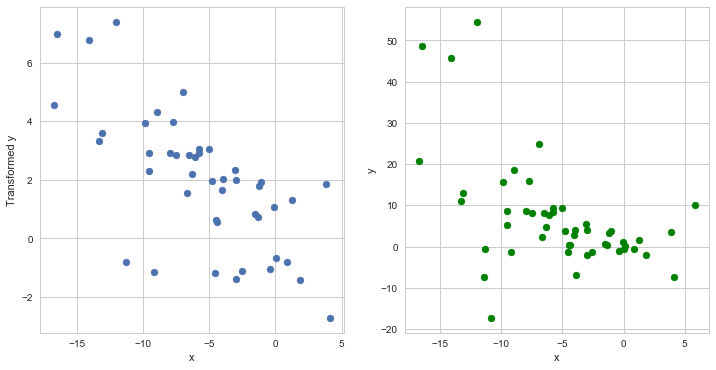

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     39.28
Date:                Mon, 19 Mar 2018   Prob (F-statistic):           1.49e-07
Time:                        00:35:31   Log-Likelihood:                -86.165
No. Observations:                  45   AIC:                             176.3
Df Residuals:                      43   BIC:                             179.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2194      0.373      0.589      0.5

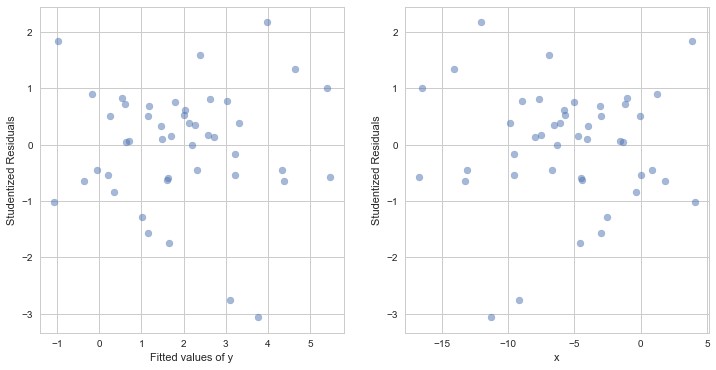

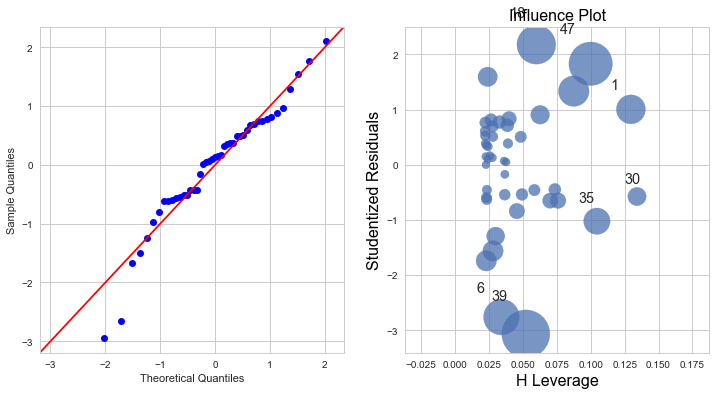

In [105]:
y_new = np.sqrt(abs(y))*np.sign(y)
# y_new = np.log(abs(y))*np.sign(y)
# y_new, _ = boxcox(y - y.min() + 1)
# y_new = pd.DataFrame(data=y_new, columns=['y'])
X_new = X
# X_new.x = (X_new.x)**2
# X_new.x = np.log(abs(X.x))*np.sign(X.x)
# X_new.x = np.cbrt(abs(X.x))*np.sign(X.x)

y_new = y_new.drop([14, 40, 19, 10, 9])
X_new = X_new.drop([14, 40, 19, 10, 9])

fig = plt.figure(figsize=[12,6])
ax1 = fig.add_subplot(121)
ax1.scatter(X_new.x, y_new);
ax1.set_xlabel('x')
ax1.set_ylabel('Transformed y')
ax2 = fig.add_subplot(122)
ax2.scatter(X.x, y, color='green');
ax2.set_xlabel('x')
ax2.set_ylabel('y')
plt.show()

lm_log = sm.OLS(y_new, X_new).fit()
b, a = lm_log.params
print lm_log.summary()

print 'Breusch-Pagan Lagrange Multiplier test for heteroscedasticity'
print '(lm, lm_pvalue, fvalue, f_pvalue)'
print hetero_test(y_new, X_new)


student_resid = lm_log.outlier_test()['student_resid']
predictions = lm_log.fittedvalues
fig = plt.figure(figsize=[12,6])
ax1 = fig.add_subplot(121)
plt.scatter(predictions, student_resid, alpha=0.5);
plt.xlabel('Fitted values of y')
plt.ylabel('Studentized Residuals')
ax2 = fig.add_subplot(122)
plt.scatter(X_new.x, student_resid, alpha=0.5);
plt.xlabel('x')
plt.ylabel('Studentized Residuals')
plt.show()



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[12,6])
sm.graphics.qqplot(student_resid, line='45', fit=True, ax=ax1)
sm.graphics.influence_plot(lm_log, ax=ax2, criterion="cooks")
plt.show()

-0.313622228238 0.219439878812


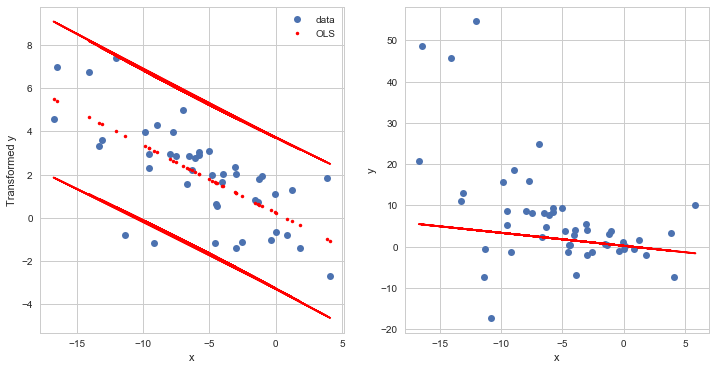

In [106]:
prstd, iv_l, iv_u = wls_prediction_std(lm_log)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.plot(X_new.x, y_new, 'o', label="data")
ax1.plot(X_new.x, lm_log.fittedvalues, 'r.', label="OLS")
ax1.plot(X_new.x, iv_u, 'r-')
ax1.plot(X_new.x, iv_l, 'r-')
ax1.legend(loc='best');
ax1.set_xlabel('x')
ax1.set_ylabel('Transformed y')

ax2.plot(X.x, y, 'o', label="data");
ax2.plot(X.x, a*X.x + b, 'r-', label="OLS");
ax2.set_xlabel('x')
ax2.set_ylabel('y');
print a, b

In [107]:
data[5] = pd.concat([X_new.x, y_new], axis=1)

#### 4.2 Modeling data:

In [108]:
for i in xrange(1, len(data)+1):
    print 'Modeling data in file data1_%d.csv' % i
    X = data[i].x.values.reshape(-1, 1)
    y = data[i].y.values#.reshape(-1, 1)
    
    print 'Linear regression model: y = ax + b'
    ols = LinearRegression()
    kf = KFold(5, shuffle=True)
    w_0 = np.array([])
    w_1 = np.array([])
    error = np.array([])
    r2 = np.array([])
    for k, (train, test) in enumerate(kf.split(X, y)):
        ols.fit(X[train], y[train])
        w_0 = np.append(w_0, ols.intercept_)
        w_1 = np.append(w_1, ols.coef_[0])
        error = np.append(error, mean_squared_error(y[test], ols.predict(X[test])))
        r2 = np.append(r2, ols.score(X[test], y[test]))
    a = w_1.mean()
    b = w_0.mean()
    e = error.mean()
    print 'OLS   lin Reg: a = %.2f , b = %.2f , MSE = %.3f, R^2 = %.3f' % (a, b, e, r2.mean())
    # clf = GridSearchCV(LinearRegression(), cv=5)
    # clf.fit(data1.x, data1.y)


    lso = LassoCV(cv=5)
    kf = KFold(5, shuffle=True)
    w_0 = np.array([])
    w_1 = np.array([])
    error = np.array([])
    r2 = np.array([])
    for k, (train, test) in enumerate(kf.split(X, y)):
        lso.fit(X[train], y[train])
        w_0 = np.append(w_0, lso.intercept_)
        w_1 = np.append(w_1, lso.coef_[0])
        error = np.append(error, mean_squared_error(y[test], lso.predict(X[test])))
        r2 = np.append(r2, lso.score(X[test], y[test]))
    #     print lso.alpha_
    a = w_1.mean()
    b = w_0.mean()
    e = error.mean()
    print 'LASSO lin reg: a = %.2f , b = %.2f , MSE = %.3f, R^2 = %.3f' % (a, b, e, r2.mean())

    alphas = np.logspace(-4, 4, 30)
    rdg = RidgeCV(alphas=alphas, cv=5)
    kf = KFold(5, shuffle=True)
    w_0 = np.array([])
    w_1 = np.array([])
    error = np.array([])
    r2 = np.array([])
    for k, (train, test) in enumerate(kf.split(X, y)):
        rdg.fit(X[train], y[train])
        w_0 = np.append(w_0, rdg.intercept_)
        w_1 = np.append(w_1, rdg.coef_[0])
        error = np.append(error, mean_squared_error(y[test], rdg.predict(X[test])))
        r2 = np.append(r2, rdg.score(X[test], y[test]))
    #     print rdg.alpha_
    a = w_1.mean()
    b = w_0.mean()
    e = error.mean()
    print 'Ridge lin reg: a = %.2f , b = %.2f , MSE = %.3f, R^2 = %.3f' % (a, b, e, r2.mean())
    print

Modeling data in file data1_1.csv
Linear regression model: y = ax + b
OLS   lin Reg: a = 0.41 , b = -0.06 , MSE = 2.684, R^2 = 0.229
LASSO lin reg: a = 0.40 , b = -0.06 , MSE = 2.571, R^2 = 0.294
Ridge lin reg: a = 0.39 , b = -0.06 , MSE = 2.545, R^2 = 0.292

Modeling data in file data1_2.csv
Linear regression model: y = ax + b
OLS   lin Reg: a = 0.31 , b = -0.20 , MSE = 3.745, R^2 = 0.642
LASSO lin reg: a = 0.30 , b = -0.20 , MSE = 3.753, R^2 = 0.661
Ridge lin reg: a = 0.29 , b = -0.20 , MSE = 3.784, R^2 = 0.675

Modeling data in file data1_3.csv
Linear regression model: y = ax + b
OLS   lin Reg: a = -0.15 , b = 0.47 , MSE = 7.279, R^2 = 0.231
LASSO lin reg: a = -0.15 , b = 0.46 , MSE = 7.245, R^2 = 0.245
Ridge lin reg: a = -0.14 , b = 0.47 , MSE = 8.054, R^2 = -0.060

Modeling data in file data1_4.csv
Linear regression model: y = ax + b
OLS   lin Reg: a = -0.13 , b = 0.54 , MSE = 1.009, R^2 = -0.096
LASSO lin reg: a = -0.04 , b = 0.33 , MSE = 1.079, R^2 = -0.511
Ridge lin reg: a = -0

### Observation:

Based on the current datasets, and more specifically for datasets from files data1_4.csv and data1_5.csv, a first degree polynomial hypothesis set may not be the best choice to model our samples data generation process. ***This is a high bias problem!***